In [1]:
#Library import
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score,precision_score,recall_score, plot_roc_curve,plot_confusion_matrix,plot_precision_recall_curve

# Data Import

In [2]:
data= pd.read_csv("general_data.csv")
emp_surv = pd.read_csv("employee_survey_data.csv")
mgr_surv = pd.read_csv("manager_survey_data.csv")
merged = pd.merge(data, emp_surv, how="left", on="EmployeeID")
data = pd.merge(merged, mgr_surv, how="left", on="EmployeeID")

# Exploratory Data Analysis

In [3]:
data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [6]:
data.Attrition.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

Class no: 3699
Class Yes: 711
Proportion: 5.2 : 1


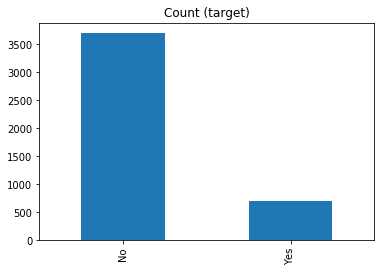

In [7]:
target_count = data.Attrition.value_counts()
print('Class no:', target_count[0])
print('Class Yes:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');


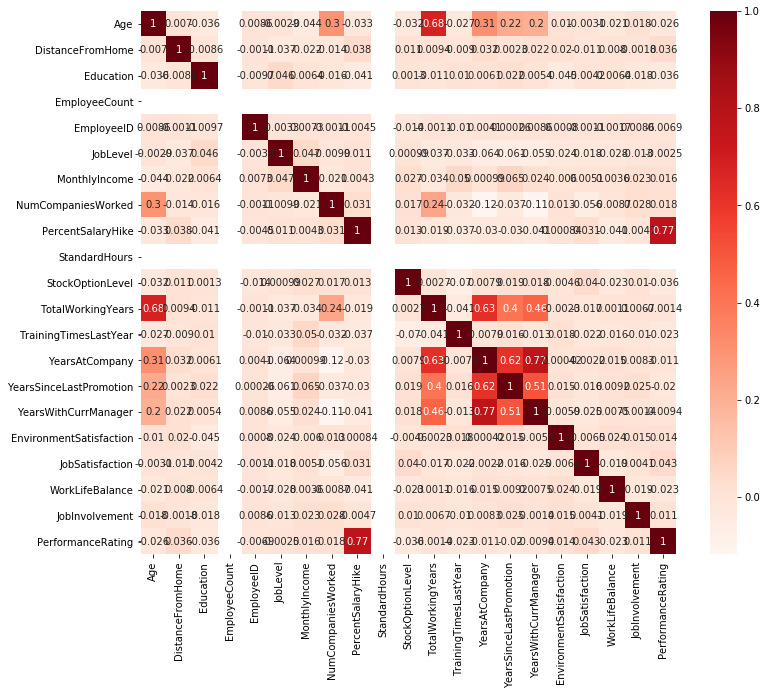

In [8]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Data Preprocessing

### Missing value treatment

In [9]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

### Class Balancing

In [10]:
count_class_0, count_class_1 = data.Attrition.value_counts()

# Divide by class
data_class_0 = data[data['Attrition'] == 'No']
data_class_1 = data[data['Attrition'] == 'Yes']

Random over-sampling:
Yes    3605
No     3605
Name: Attrition, dtype: int64


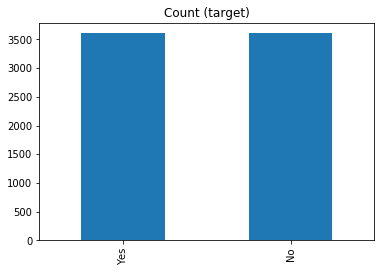

In [11]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_over.Attrition.value_counts())

data_over.Attrition.value_counts().plot(kind='bar', title='Count (target)')

### Label Encoding

In [12]:
#Label Encoding for object to numeric conversion
le = LabelEncoder()

In [13]:
le.fit(data['Attrition'])
data['Attrition']= le.transform(data['Attrition'])
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [14]:
#Label Encoding for object to numeric conversion
ole = LabelEncoder()

In [15]:
objList = data.select_dtypes(include = "object").columns
objList

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')

In [16]:
for feat in objList:
    data[feat] = ole.fit_transform(data[feat].astype(str))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int32  
 2   BusinessTravel           4300 non-null   int32  
 3   Department               4300 non-null   int32  
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   int32  
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   int32  
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   int32  
 12  MaritalStatus            4300 non-null   int32  
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked      

### Feature Selection

In [17]:
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

In [18]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=15)

In [19]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)

In [20]:
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Department', 'Education', 'EducationField', 'Gender', 'MaritalStatus',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')


In [21]:
X=X[selected_features_rfe]

In [22]:
chi_scores = chi2(X,y)
chi_scores

(array([1.88234960e+00, 3.59785239e-01, 1.04485118e+01, 5.99735824e-01,
        5.39519081e+01, 1.91944075e+01, 6.57425307e+02, 5.47104437e+00,
        1.83569673e+01, 3.19510598e+02, 2.02209262e+01, 2.03601839e+01,
        2.79088210e+00, 1.72095478e-01, 1.22472976e-01]),
 array([1.70067341e-001, 5.48625532e-001, 1.22748310e-003, 4.38678839e-001,
        2.05457394e-013, 1.18058756e-005, 5.42334546e-145, 1.93340686e-002,
        1.83148006e-005, 1.85141568e-071, 6.89940647e-006, 6.41507665e-006,
        9.48020295e-002, 6.78256165e-001, 7.26367673e-001]))

In [23]:
probabilty = pd.Series(chi_scores[1],index = X.columns)
probabilty.sort_values(ascending = False , inplace = True)

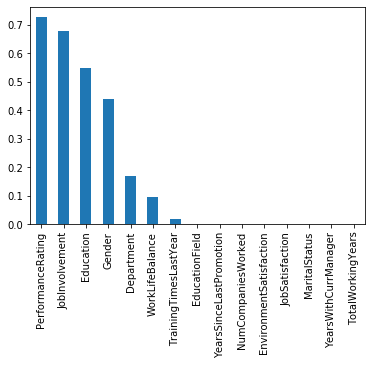

In [24]:
probabilty.plot.bar()

In [25]:
dfscores = pd.DataFrame(chi_scores[0])
dfprobability = pd.DataFrame(chi_scores[1])
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfprobability,dfscores],axis=1)
featureScores.columns = ['Features','probability','Score'] 
featureScores

,Features,probability,Score
0,Department,1.700673e-01,1.882350
1,Education,5.486255e-01,0.359785
2,EducationField,1.227483e-03,10.448512
3,Gender,4.386788e-01,0.599736
4,MaritalStatus,2.054574e-13,53.951908
5,NumCompaniesWorked,1.180588e-05,19.194407
6,TotalWorkingYears,5.423345e-145,657.425307
7,TrainingTimesLastYear,1.933407e-02,5.471044
8,YearsSinceLastPromotion,1.831480e-05,18.356967
9,YearsWithCurrManager,1.851416e-71,319.510598


In [26]:
featureScores = featureScores[featureScores['probability']<0.05]
featureScores.sort_values(by='Score')

,Features,probability,Score
7,TrainingTimesLastYear,1.933407e-02,5.471044
2,EducationField,1.227483e-03,10.448512
8,YearsSinceLastPromotion,1.831480e-05,18.356967
5,NumCompaniesWorked,1.180588e-05,19.194407
10,EnvironmentSatisfaction,6.899406e-06,20.220926
11,JobSatisfaction,6.415077e-06,20.360184
4,MaritalStatus,2.054574e-13,53.951908
9,YearsWithCurrManager,1.851416e-71,319.510598
6,TotalWorkingYears,5.423345e-145,657.425307


### Data Preparation

In [27]:
X=X[featureScores['Features']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EducationField           4300 non-null   int32  
 1   MaritalStatus            4300 non-null   int32  
 2   NumCompaniesWorked       4300 non-null   float64
 3   TotalWorkingYears        4300 non-null   float64
 4   TrainingTimesLastYear    4300 non-null   int64  
 5   YearsSinceLastPromotion  4300 non-null   int64  
 6   YearsWithCurrManager     4300 non-null   int64  
 7   EnvironmentSatisfaction  4300 non-null   float64
 8   JobSatisfaction          4300 non-null   float64
dtypes: float64(4), int32(2), int64(3)
memory usage: 302.3 KB


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
score= pd.DataFrame()

# Boosting techniques

## CATBoost

In [30]:
cat = CatBoostClassifier(iterations=100, learning_rate=0.85)

In [31]:
cat.fit(X_train, y_train)

0:	learn: 0.4492867	total: 82ms	remaining: 8.12s
1:	learn: 0.3804813	total: 86.1ms	remaining: 4.22s
2:	learn: 0.3558742	total: 90.2ms	remaining: 2.91s
3:	learn: 0.3416108	total: 95ms	remaining: 2.28s
4:	learn: 0.3295733	total: 99.7ms	remaining: 1.89s
5:	learn: 0.3220465	total: 104ms	remaining: 1.63s
6:	learn: 0.3175809	total: 109ms	remaining: 1.45s
7:	learn: 0.3120167	total: 113ms	remaining: 1.3s
8:	learn: 0.2952102	total: 118ms	remaining: 1.19s
9:	learn: 0.2852896	total: 123ms	remaining: 1.1s
10:	learn: 0.2781628	total: 127ms	remaining: 1.03s
11:	learn: 0.2719511	total: 131ms	remaining: 962ms
12:	learn: 0.2664688	total: 135ms	remaining: 906ms
13:	learn: 0.2603223	total: 139ms	remaining: 855ms
14:	learn: 0.2578754	total: 143ms	remaining: 810ms
15:	learn: 0.2499897	total: 147ms	remaining: 770ms
16:	learn: 0.2429104	total: 151ms	remaining: 736ms
17:	learn: 0.2389186	total: 155ms	remaining: 705ms
18:	learn: 0.2341804	total: 159ms	remaining: 678ms
19:	learn: 0.2304828	total: 162ms	remainin

In [32]:
cat.predict_proba(data=X_test)

array([[9.99319678e-01, 6.80321510e-04],
       [8.84523423e-01, 1.15476577e-01],
       [9.20810185e-01, 7.91898154e-02],
       ...,
       [9.92384889e-01, 7.61511120e-03],
       [9.74026643e-01, 2.59733571e-02],
       [9.86756760e-01, 1.32432405e-02]])

In [33]:
predcat= cat.predict(data=X_test)
predcat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [34]:
acc= accuracy_score(y_test,predcat)*100
acc

94.65116279069767

In [35]:
f1= f1_score(y_test,predcat)*100
f1

80.83333333333333

In [36]:
prec= precision_score(y_test,predcat)*100
prec

98.9795918367347

In [37]:
rec= recall_score(y_test,predcat)*100
rec

68.30985915492957

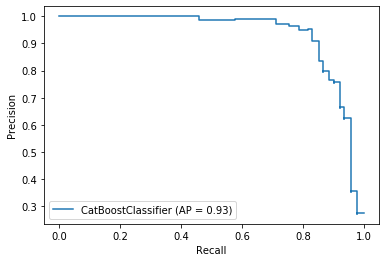

In [38]:
plot_precision_recall_curve(cat,X_test,y_test)

[[717   1]
 [ 45  97]]


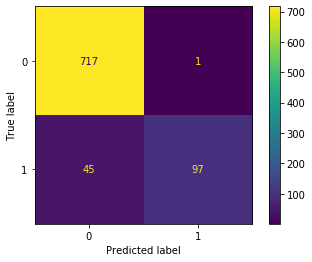

In [39]:
print(confusion_matrix(y_test,predcat))
plot_confusion_matrix(cat,X_test,y_test)

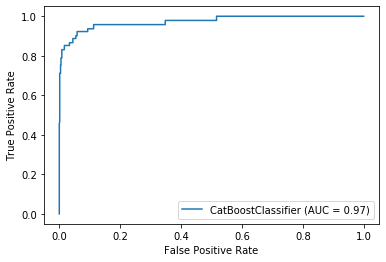

In [40]:
plot_roc_curve(cat,X_test,y_test)

In [41]:
score= score.append([['CatBoost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859


## Gradient Boost

In [42]:
gbc = GradientBoostingClassifier(random_state=0)

In [43]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [44]:
gbc.predict_proba(X_test)

array([[0.82262855, 0.17737145],
       [0.74283322, 0.25716678],
       [0.78441346, 0.21558654],
       ...,
       [0.9251995 , 0.0748005 ],
       [0.90427576, 0.09572424],
       [0.90091911, 0.09908089]])

In [45]:
predgbc= gbc.predict(X_test)
predgbc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
acc= accuracy_score(y_test,predgbc)*100
acc

86.04651162790698

In [47]:
f1= f1_score(y_test,predgbc)*100
f1

34.78260869565217

In [48]:
prec= precision_score(y_test,predgbc)*100
prec

76.19047619047619

In [49]:
rec= recall_score(y_test,predgbc)*100
rec

22.535211267605636

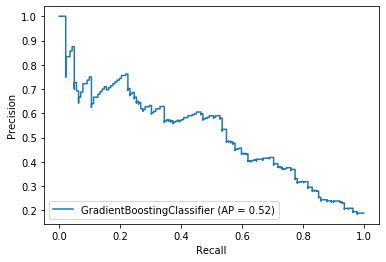

In [50]:
plot_precision_recall_curve(gbc,X_test,y_test)

[[708  10]
 [110  32]]


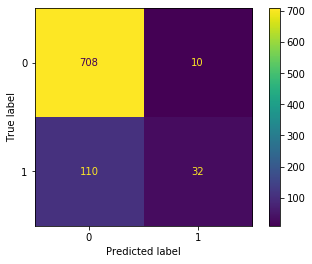

In [51]:
print(confusion_matrix(y_test,predgbc))
plot_confusion_matrix(gbc,X_test,y_test)

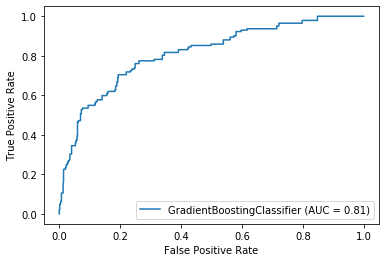

In [52]:
plot_roc_curve(gbc,X_test,y_test)

In [53]:
score= score.append([['Gradient Boost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211


## XG Boost

In [54]:
xgb = XGBClassifier(n_estimators=20)

In [55]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
xgb.predict_proba(X_test)

array([[0.9154826 , 0.08451743],
       [0.8976994 , 0.10230057],
       [0.8842099 , 0.11579011],
       ...,
       [0.9417563 , 0.0582437 ],
       [0.8763827 , 0.12361729],
       [0.9451802 , 0.05481983]], dtype=float32)

In [57]:
predxgb= xgb.predict(X_test)
predxgb

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [58]:
acc= accuracy_score(y_test,predxgb)*100
acc

88.95348837209302

In [59]:
f1= f1_score(y_test,predxgb)*100
f1

54.106280193236714

In [60]:
prec= precision_score(y_test,predxgb)*100
prec

86.15384615384616

In [61]:
rec= recall_score(y_test,predxgb)*100
rec

39.436619718309856

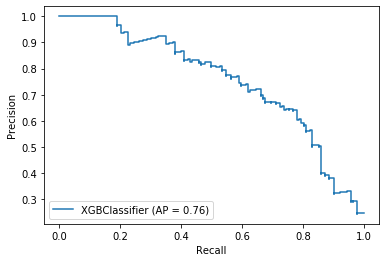

In [62]:
plot_precision_recall_curve(xgb,X_test,y_test)

[[709   9]
 [ 86  56]]


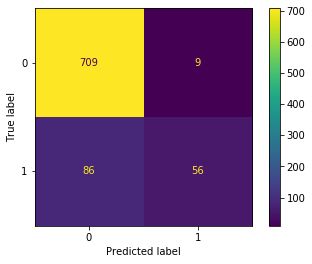

In [63]:
print(confusion_matrix(y_test,predxgb))
plot_confusion_matrix(xgb,X_test,y_test)

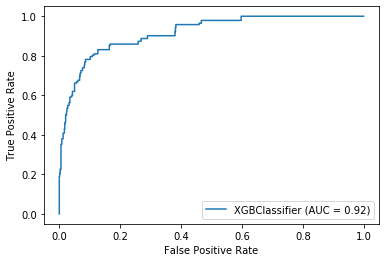

In [64]:
plot_roc_curve(xgb,X_test,y_test)

In [65]:
score= score.append([['XGBoost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620


## Light GBM

In [66]:
lgbm = LGBMClassifier()

In [67]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [68]:
lgbm.predict_proba(X_test)

array([[0.9367705 , 0.0632295 ],
       [0.93352553, 0.06647447],
       [0.94553914, 0.05446086],
       ...,
       [0.96730542, 0.03269458],
       [0.90793454, 0.09206546],
       [0.98048373, 0.01951627]])

In [69]:
predlgbm= lgbm.predict(X_test)
predlgbm

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [70]:
acc= accuracy_score(y_test,predlgbm)*100
acc

94.06976744186046

In [71]:
f1= f1_score(y_test,predlgbm)*100
f1

79.01234567901234

In [72]:
prec= precision_score(y_test,predlgbm)*100
prec

95.04950495049505

In [73]:
rec= recall_score(y_test,predlgbm)*100
rec

67.6056338028169

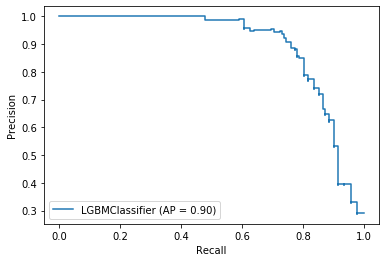

In [74]:
plot_precision_recall_curve(lgbm,X_test,y_test)

[[713   5]
 [ 46  96]]


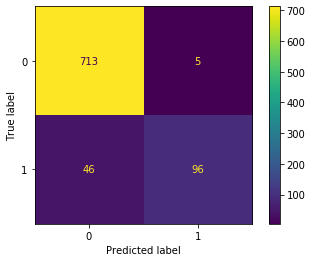

In [75]:
print(confusion_matrix(y_test,predlgbm))
plot_confusion_matrix(lgbm,X_test,y_test)

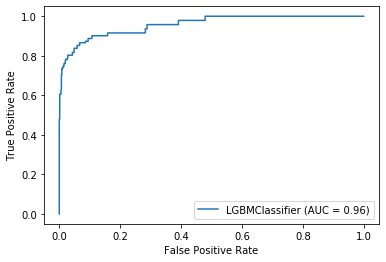

In [76]:
plot_roc_curve(lgbm,X_test,y_test)

In [77]:
score= score.append([['Light GBM', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620
0,Light GBM,94.069767,79.012346,95.049505,67.605634


## ADABoost

In [78]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=54, min_weight_fraction_leaf=0.31), algorithm="SAMME",n_estimators=200)

In [79]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=54,
                                                         min_weight_fraction_leaf=0.31),
                   n_estimators=200)

In [80]:
abc.predict_proba(X_test)

array([[0.54636064, 0.45363936],
       [0.56335878, 0.43664122],
       [0.54227808, 0.45772192],
       ...,
       [0.53059652, 0.46940348],
       [0.55478086, 0.44521914],
       [0.52770161, 0.47229839]])

In [81]:
predabc= abc.predict(X_test)
predabc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
acc= accuracy_score(y_test,predabc)*100
acc

83.13953488372093

In [83]:
f1= f1_score(y_test,predabc)*100
f1

12.121212121212123

In [84]:
prec= precision_score(y_test,predabc)*100
prec

43.47826086956522

In [85]:
rec= recall_score(y_test,predabc)*100
rec

7.042253521126761

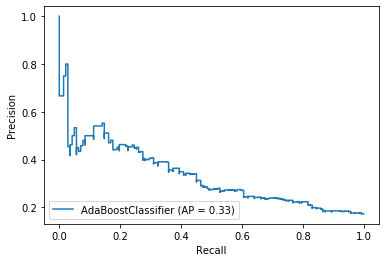

In [86]:
plot_precision_recall_curve(abc,X_test,y_test)

[[705  13]
 [132  10]]


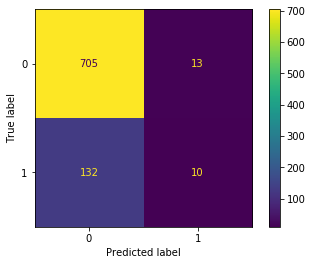

In [87]:
print(confusion_matrix(y_test,predabc))
plot_confusion_matrix(abc,X_test,y_test)

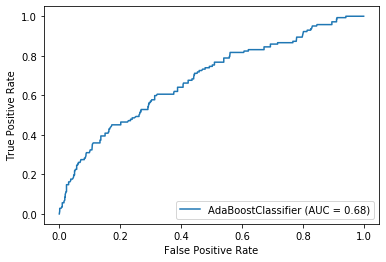

In [88]:
plot_roc_curve(abc,X_test,y_test)

In [89]:
score= score.append([['ADABoost', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620
0,Light GBM,94.069767,79.012346,95.049505,67.605634
0,ADABoost,83.139535,12.121212,43.478261,7.042254


# Bagging techniques

## Bagging Classifier

In [90]:
bagc = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=35)

In [91]:
bagc.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=35)

In [92]:
bagc.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [93]:
predbagc= bagc.predict(X_test)
predbagc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
acc= accuracy_score(y_test,predbagc)*100
acc

83.48837209302326

In [95]:
f1= f1_score(y_test,predbagc)*100
f1

0.0

In [96]:
prec= precision_score(y_test,predbagc)*100
prec

C:\Users\SHILPA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [97]:
rec= recall_score(y_test,predbagc)*100
rec

0.0

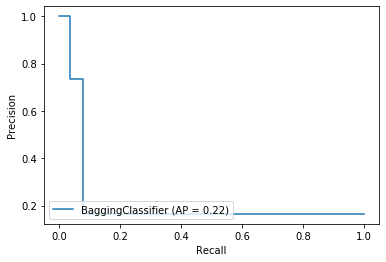

In [98]:
plot_precision_recall_curve(bagc,X_test,y_test)

[[718   0]
 [142   0]]


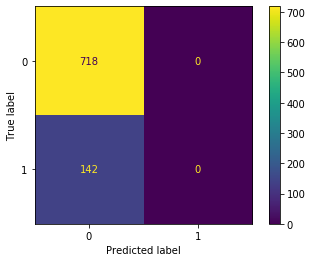

In [99]:
print(confusion_matrix(y_test,predbagc))
plot_confusion_matrix(bagc,X_test,y_test)

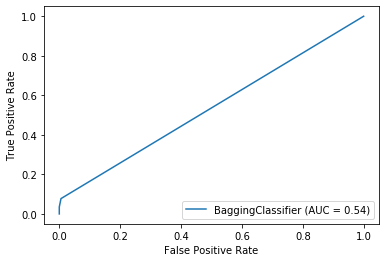

In [100]:
plot_roc_curve(bagc,X_test,y_test)

In [101]:
score= score.append([['Bagging', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620
0,Light GBM,94.069767,79.012346,95.049505,67.605634
0,ADABoost,83.139535,12.121212,43.478261,7.042254
0,Bagging,83.488372,0.000000,0.000000,0.000000


## Extra Tree Classifier

In [102]:
etc = ExtraTreesClassifier(n_estimators = 50, criterion ='entropy', max_features='sqrt')

In [103]:
etc.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_features='sqrt', n_estimators=50)

In [104]:
etc.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [105]:
predetc= etc.predict(X_test)
predetc

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [106]:
acc= accuracy_score(y_test,predetc)*100
acc

97.90697674418605

In [107]:
f1= f1_score(y_test,predetc)*100
f1

93.28358208955225

In [108]:
prec= precision_score(y_test,predetc)*100
prec

99.20634920634922

In [109]:
rec= recall_score(y_test,predetc)*100
rec

88.02816901408451

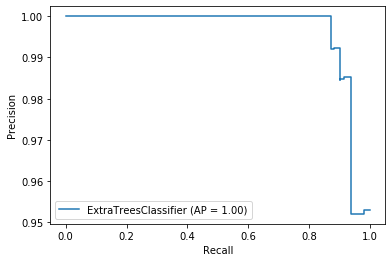

In [110]:
plot_precision_recall_curve(etc,X_test,y_test)

[[717   1]
 [ 17 125]]


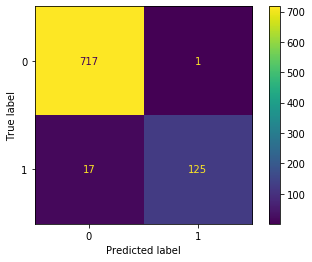

In [111]:
print(confusion_matrix(y_test,predetc))
plot_confusion_matrix(etc,X_test,y_test)

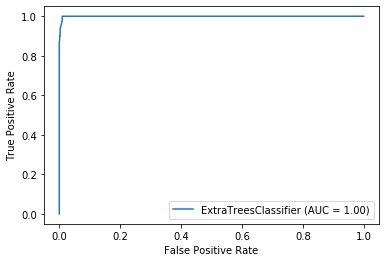

In [112]:
plot_roc_curve(etc,X_test,y_test)

In [113]:
score= score.append([['ExtraTree', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620
0,Light GBM,94.069767,79.012346,95.049505,67.605634
0,ADABoost,83.139535,12.121212,43.478261,7.042254
0,Bagging,83.488372,0.000000,0.000000,0.000000
0,ExtraTree,97.906977,93.283582,99.206349,88.028169


## Random Forest Trees

In [114]:
rft = RandomForestClassifier(max_depth=15, random_state=40)

In [115]:
rft.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=40)

In [116]:
rft.predict_proba(X_test)

array([[0.96608696, 0.03391304],
       [0.92408815, 0.07591185],
       [0.95854853, 0.04145147],
       ...,
       [0.97712317, 0.02287683],
       [0.87013651, 0.12986349],
       [0.97365595, 0.02634405]])

In [117]:
predrft= rft.predict(X_test)
predrft

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [118]:
acc= accuracy_score(y_test,predrft)*100
acc

97.20930232558139

In [119]:
f1= f1_score(y_test,predrft)*100
f1

90.83969465648855

In [120]:
prec= precision_score(y_test,predrft)*100
prec

99.16666666666667

In [121]:
rec= recall_score(y_test,predrft)*100
rec

83.80281690140845

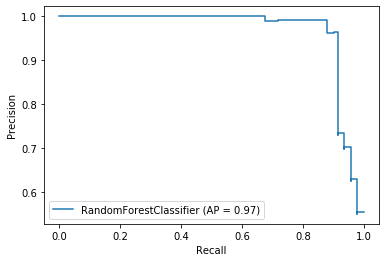

In [122]:
plot_precision_recall_curve(rft,X_test,y_test)

[[717   1]
 [ 23 119]]


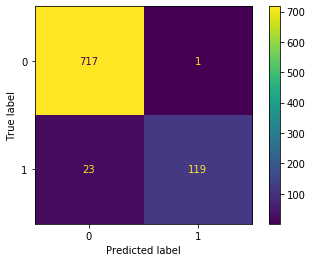

In [123]:
print(confusion_matrix(y_test,predrft))
plot_confusion_matrix(rft,X_test,y_test)

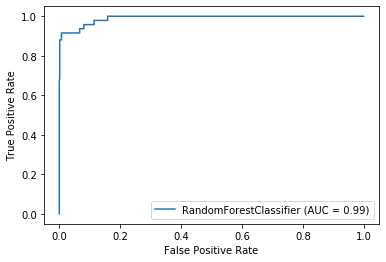

In [124]:
plot_roc_curve(rft,X_test,y_test)

In [125]:
score= score.append([['Random Forest', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620
0,Light GBM,94.069767,79.012346,95.049505,67.605634
0,ADABoost,83.139535,12.121212,43.478261,7.042254
0,Bagging,83.488372,0.000000,0.000000,0.000000
0,ExtraTree,97.906977,93.283582,99.206349,88.028169
0,Random Forest,97.209302,90.839695,99.166667,83.802817


## Decision tree

In [126]:
dt = DecisionTreeClassifier(random_state=42, max_depth=25, min_weight_fraction_leaf=0.01)

In [127]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, min_weight_fraction_leaf=0.01,
                       random_state=42)

In [128]:
dt.predict_proba(X_test)

array([[0.82608696, 0.17391304],
       [0.88888889, 0.11111111],
       [0.57142857, 0.42857143],
       ...,
       [0.68421053, 0.31578947],
       [0.6097561 , 0.3902439 ],
       [1.        , 0.        ]])

In [129]:
preddt= dt.predict(X_test)
preddt

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [130]:
acc= accuracy_score(y_test,preddt)*100
acc

84.30232558139535

In [131]:
f1= f1_score(y_test,preddt)*100
f1

36.01895734597156

In [132]:
prec= precision_score(y_test,preddt)*100
prec

55.072463768115945

In [133]:
rec= recall_score(y_test,preddt)*100
rec

26.76056338028169

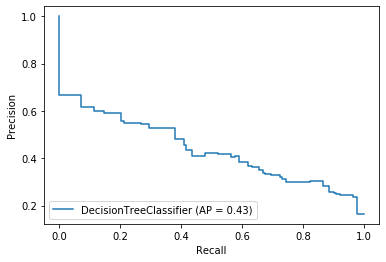

In [134]:
plot_precision_recall_curve(dt,X_test,y_test)

[[687  31]
 [104  38]]


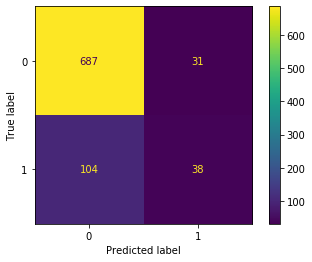

In [135]:
print(confusion_matrix(y_test,preddt))
plot_confusion_matrix(dt,X_test,y_test)

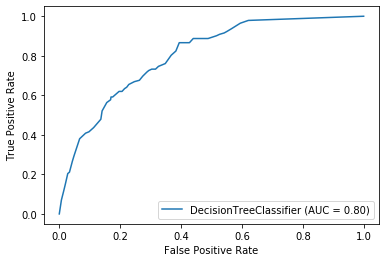

In [136]:
plot_roc_curve(dt,X_test,y_test)

In [137]:
score= score.append([['Decision tree', acc, f1, prec, rec]])
score

,0,1,2,3,4
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620
0,Light GBM,94.069767,79.012346,95.049505,67.605634
0,ADABoost,83.139535,12.121212,43.478261,7.042254
0,Bagging,83.488372,0.000000,0.000000,0.000000
0,ExtraTree,97.906977,93.283582,99.206349,88.028169
0,Random Forest,97.209302,90.839695,99.166667,83.802817
0,Decision tree,84.302326,36.018957,55.072464,26.760563


# Comparitive Analysis

In [153]:
score.columns=['Model', 'Accuracy', 'F1-Score','Precision','Recall']
score.sort_values(by='Accuracy')

,Model,Accuracy,F1-Score,Precision,Recall
0,ADABoost,83.139535,12.121212,43.478261,7.042254
0,Bagging,83.488372,0.000000,0.000000,0.000000
0,Decision tree,84.302326,36.018957,55.072464,26.760563
0,Gradient Boost,86.046512,34.782609,76.190476,22.535211
0,XGBoost,88.953488,54.106280,86.153846,39.436620
0,Light GBM,94.069767,79.012346,95.049505,67.605634
0,CatBoost,94.651163,80.833333,98.979592,68.309859
0,Random Forest,97.209302,90.839695,99.166667,83.802817
0,ExtraTree,97.906977,93.283582,99.206349,88.028169


Text(0, 0.5, 'Accuracy')

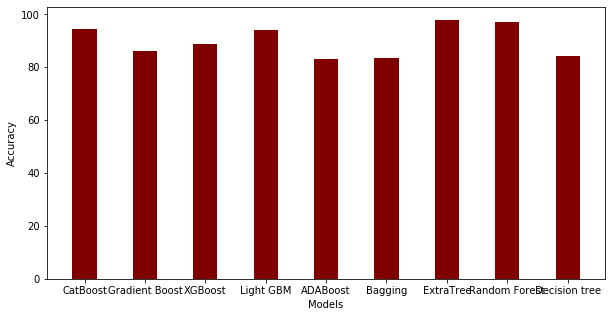

In [139]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(score['Model'], score['Accuracy'], color ='maroon', width = 0.4) 
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'F1 Score')

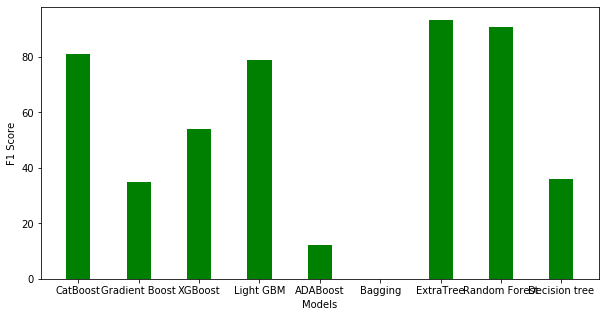

In [140]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(score['Model'], score['F1-Score'], color ='green', width = 0.4) 
plt.xlabel('Models')
plt.ylabel('F1 Score')

Text(0, 0.5, 'Precision')

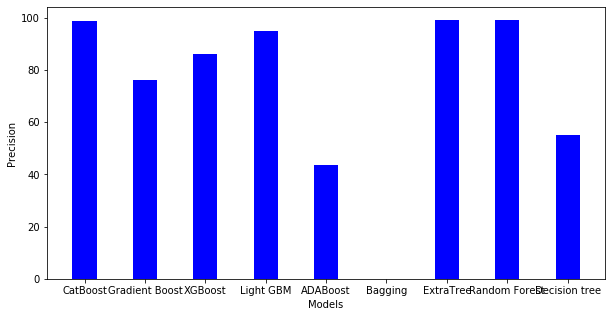

In [141]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(score['Model'], score['Precision'], color ='blue', width = 0.4) 
plt.xlabel('Models')
plt.ylabel('Precision')

Text(0, 0.5, 'Recall')

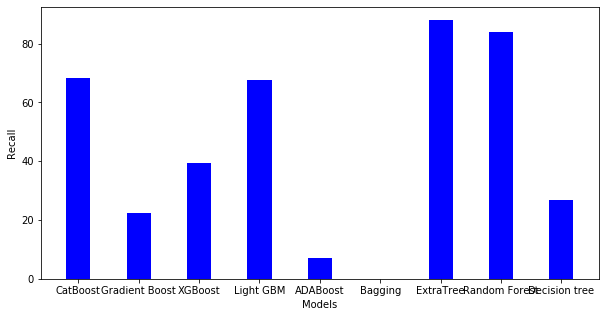

In [142]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(score['Model'], score['Recall'], color ='blue', width = 0.4) 
plt.xlabel('Models')
plt.ylabel('Recall')

In [143]:
result= pd.DataFrame()
result['emplyeeID']=X_test.index
result['Actual']=le.inverse_transform(y_test)
result['CatBoost']=le.inverse_transform(predcat)
result['GradientBoost']=le.inverse_transform(predgbc)
result['XGBoost']=le.inverse_transform(predxgb)
result['LightGBM']=le.inverse_transform(predlgbm)
result['AdaBoost']=le.inverse_transform(predabc)
result['BaggingClassifier']=le.inverse_transform(predbagc)
result['ExtraTrees']=le.inverse_transform(predetc)
result['RandomForest']=le.inverse_transform(predrft)
result['DecisionTree']=le.inverse_transform(preddt)
result.head(50)

,emplyeeID,Actual,CatBoost,GradientBoost,XGBoost,LightGBM,AdaBoost,BaggingClassifier,ExtraTrees,RandomForest,DecisionTree
0,2441,No,No,No,No,No,No,No,No,No,No
1,2618,No,No,No,No,No,No,No,No,No,No
2,2176,No,No,No,No,No,No,No,No,No,No
3,3831,No,No,No,No,No,No,No,No,No,No
4,224,Yes,No,No,No,No,No,No,Yes,Yes,No
5,2093,No,No,No,No,No,No,No,No,No,No
6,652,No,No,No,No,No,No,No,No,No,No
7,1839,No,No,No,No,No,No,No,No,No,No
8,2010,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
9,3872,No,No,No,No,No,No,No,No,No,No
